#### 기본 설정

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import platform

In [13]:
df = pd.read_csv("/Users/kkkg0829/Desktop/project/data set/B0005_discharge.csv")

In [14]:
# 음수 변환
df['Current_load_corrected'] = -abs(df['Current_load'])

# 에러값 계산
df['Error_Current'] = df['Current_load_corrected'] - df['Current_measured']
df['Error_Voltage'] = df['Voltage_load'] - df['Voltage_measured']

# 통계량 계산 (평균, 분산, 표준편차, 범위)
def range_val(x):
    return x.max() - x.min()

stats = df.groupby('cycle_idx')[['Error_Current', 'Error_Voltage']].agg(['mean', 'var', 'std', range_val])
stats.columns = ['_'.join(col) for col in stats.columns]
stats = stats.reset_index()
stats

,cycle_idx,Error_Current_mean,Error_Current_var,Error_Current_std,Error_Current_range_val,Error_Voltage_mean,Error_Voltage_var,Error_Voltage_std,Error_Voltage_range_val
0,2,0.013132,0.000017,0.004123,0.021143,-1.124885,0.469018,0.684849,4.206743
1,4,0.012977,0.000020,0.004429,0.022148,-1.138060,0.471051,0.686331,4.204892
2,6,0.012911,0.000019,0.004415,0.020458,-1.145767,0.482000,0.694262,4.203988
3,8,0.012726,0.000018,0.004188,0.019883,-1.135377,0.454411,0.674100,4.203709
4,10,0.013238,0.000018,0.004234,0.021527,-1.133838,0.450554,0.671233,4.203914
...,...,...,...,...,...,...,...,...,...
163,600,0.012689,0.000028,0.005267,0.022473,-1.393294,0.888044,0.942361,4.211750
164,604,0.012361,0.000029,0.005426,0.024222,-1.404321,0.907326,0.952536,4.211398
165,608,0.012367,0.000032,0.005672,0.029083,-1.404089,0.904585,0.951097,4.211682
166,612,0.012468,0.000029,0.005343,0.021044,-1.363611,0.848734,0.921267,4.200469


In [15]:
stats.describe()

,cycle_idx,Error_Current_mean,Error_Current_var,Error_Current_std,Error_Current_range_val,Error_Voltage_mean,Error_Voltage_var,Error_Voltage_std,Error_Voltage_range_val
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,294.000000,0.012967,0.000020,0.004403,0.022783,-1.202443,0.535494,0.713424,4.211436
std,184.947314,0.000513,0.000007,0.000774,0.002713,0.118608,0.230734,0.163338,0.004803
min,2.000000,0.011904,0.000009,0.002935,0.019036,-1.404321,0.173888,0.416999,4.199706
25%,133.000000,0.012468,0.000014,0.003772,0.020944,-1.307396,0.316952,0.562985,4.210532
50%,292.000000,0.013046,0.000020,0.004438,0.022153,-1.203303,0.514844,0.717526,4.212190
75%,454.000000,0.013406,0.000026,0.005123,0.023672,-1.082609,0.756642,0.869851,4.214499
max,614.000000,0.013927,0.000033,0.005779,0.035438,-1.028563,0.907326,0.952536,4.238429


In [16]:
system_name = platform.system()
if system_name == 'Darwin': # Mac 환경
    plt.rc('font', family='AppleGothic')
elif system_name == 'Windows': # Windows 환경
    plt.rc('font', family='Malgun Gothic')
else: # 리눅스 등
    plt.rc('font', family='NanumGothic')

# 마이너스 부호 깨짐 방지
plt.rc('axes', unicode_minus=False)

NameError: name 'stats_per_cycle' is not defined

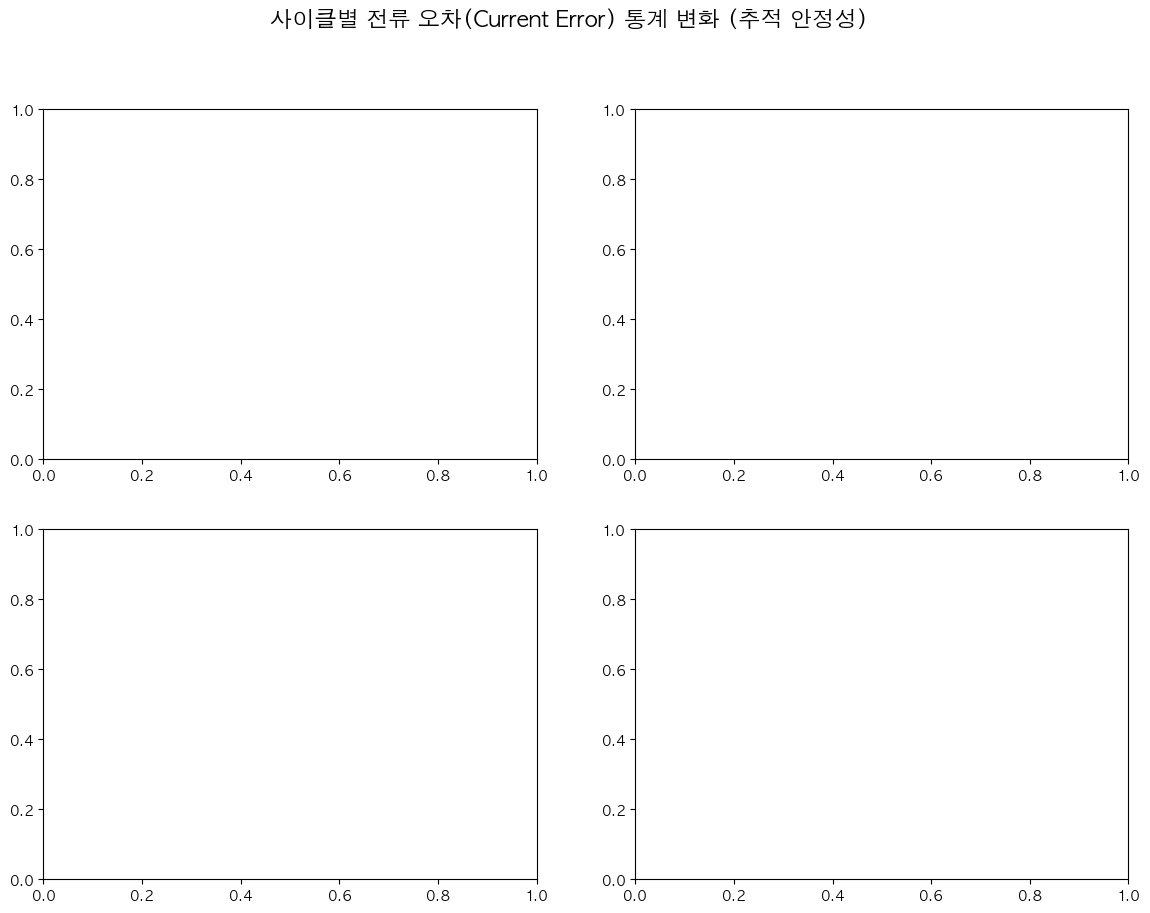

In [17]:
# (1) Current Error (전류 추적 안정성) 시각화
fig1, axes1 = plt.subplots(2, 2, figsize=(14, 10))
fig1.suptitle('사이클별 전류 오차(Current Error) 통계 변화 (추적 안정성)', fontsize=16)

# 1. 평균 (Mean)
sns.scatterplot(ax=axes1[0, 0], data=stats_per_cycle, x='cycle_idx', y='Error_Current_mean')
axes1[0, 0].set_title('전류 오차 평균 (A)')
axes1[0, 0].set_ylabel('평균 오차 (A)')
axes1[0, 0].set_xlabel('사이클 (Cycle)')

# 2. 분산 (Variance)
sns.scatterplot(ax=axes1[0, 1], data=stats_per_cycle, x='cycle_idx', y='Error_Current_var')
axes1[0, 1].set_title('전류 오차 분산')
axes1[0, 1].set_ylabel('분산 (Variance)')
axes1[0, 1].set_xlabel('사이클 (Cycle)')

# 3. 표준편차 (Std Dev)
sns.scatterplot(ax=axes1[1, 0], data=stats_per_cycle, x='cycle_idx', y='Error_Current_std')
axes1[1, 0].set_title('전류 오차 표준편차 (노이즈/잡음)')
axes1[1, 0].set_ylabel('표준편차 (A)')
axes1[1, 0].set_xlabel('사이클 (Cycle)')

# 4. 범위 (Range)
sns.scatterplot(ax=axes1[1, 1], data=stats_per_cycle, x='cycle_idx', y='Error_Current_range')
axes1[1, 1].set_title('전류 오차 범위 (최대-최소)')
axes1[1, 1].set_ylabel('범위 (A)')
axes1[1, 1].set_xlabel('사이클 (Cycle)')

plt.tight_layout()
plt.show()

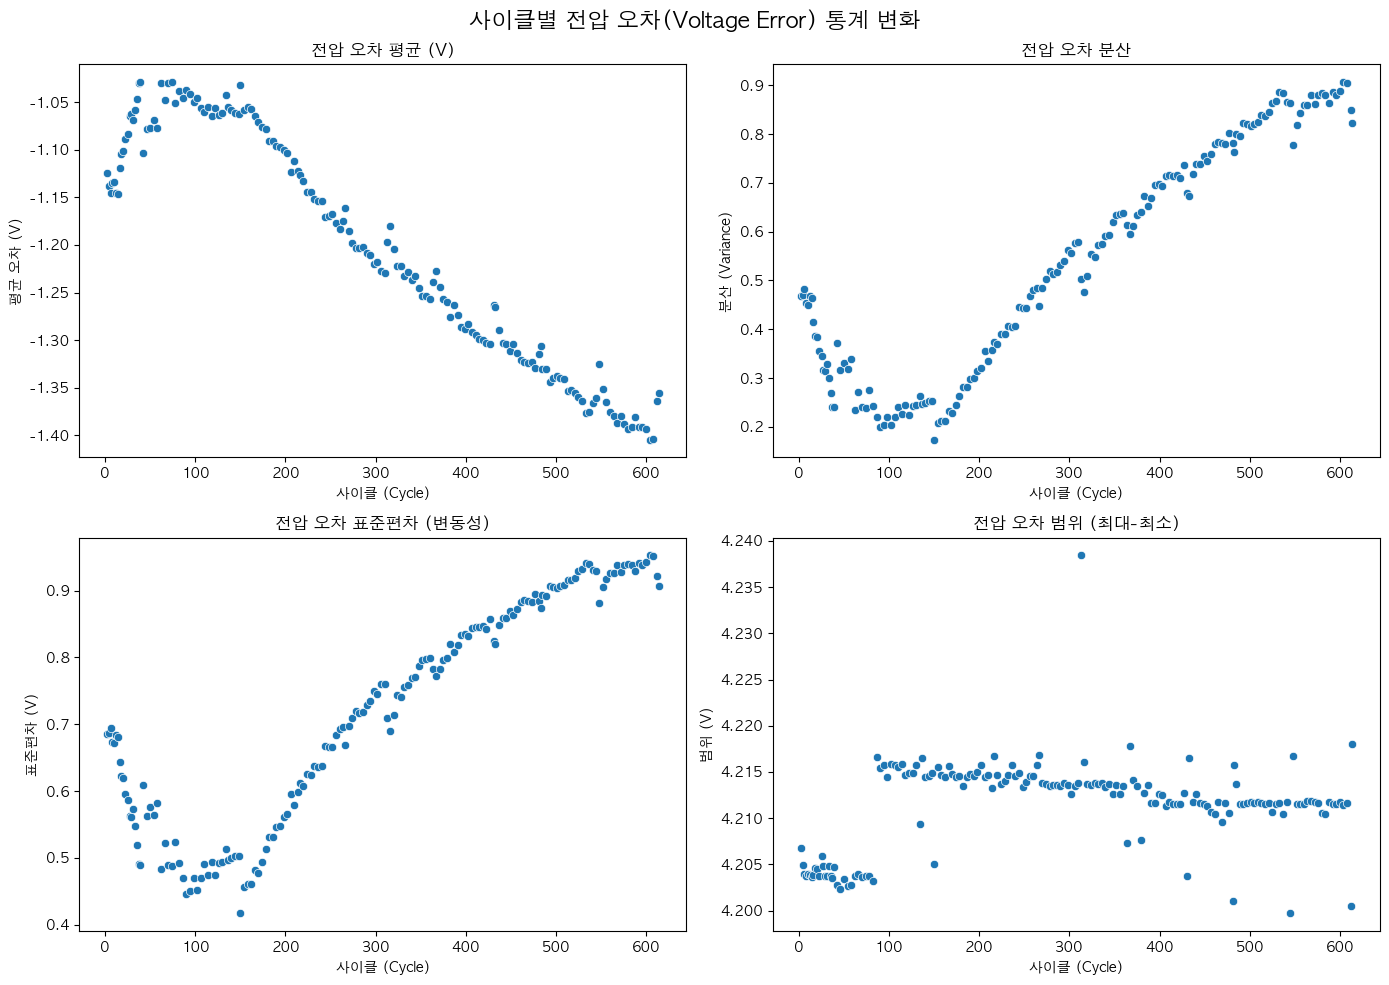

In [79]:
# (2) Voltage Error (전압 오차) 시각화
fig2, axes2 = plt.subplots(2, 2, figsize=(14, 10))
fig2.suptitle('사이클별 전압 오차(Voltage Error) 통계 변화', fontsize=16)

# 1. 평균 (Mean)
sns.scatterplot(ax=axes2[0, 0], data=stats_per_cycle, x='cycle_idx', y='Error_Voltage_mean')
axes2[0, 0].set_title('전압 오차 평균 (V)')
axes2[0, 0].set_ylabel('평균 오차 (V)')
axes2[0, 0].set_xlabel('사이클 (Cycle)')

# 2. 분산 (Variance)
sns.scatterplot(ax=axes2[0, 1], data=stats_per_cycle, x='cycle_idx', y='Error_Voltage_var')
axes2[0, 1].set_title('전압 오차 분산')
axes2[0, 1].set_ylabel('분산 (Variance)')
axes2[0, 1].set_xlabel('사이클 (Cycle)')

# 3. 표준편차 (Std Dev)
sns.scatterplot(ax=axes2[1, 0], data=stats_per_cycle, x='cycle_idx', y='Error_Voltage_std')
axes2[1, 0].set_title('전압 오차 표준편차 (변동성)')
axes2[1, 0].set_ylabel('표준편차 (V)')
axes2[1, 0].set_xlabel('사이클 (Cycle)')

# 4. 범위 (Range)
sns.scatterplot(ax=axes2[1, 1], data=stats_per_cycle, x='cycle_idx', y='Error_Voltage_range')
axes2[1, 1].set_title('전압 오차 범위 (최대-최소)')
axes2[1, 1].set_ylabel('범위 (V)')
axes2[1, 1].set_xlabel('사이클 (Cycle)')

plt.tight_layout()
plt.show()

#### 좀 더 깊이 들어가볼까요

In [20]:
# 사이클별 표준편차(변동성) 계산
stat = df.groupby('cycle_idx')[['Error_Current', 'Error_Voltage']].std()
stat.columns = ['Current_Noise', 'Voltage_Instability']
stat = stat.reset_index()


current_noise : 전류가 얼마나 일정하게 떨리는지

- 전류오차(목표값-실제값)의 표준편차

    - 이게 엄청 커지면 장비고장, 그대로인데 전압만 이상하면 배터리노화

배터리가 노후화되면 전압이 일정하지 않고 흔들림 (std 살펴볼 것) -> Voltage_Instabillity(노후화지표)

In [43]:
fig = make_subplots(rows=2, cols=1, 
                    subplot_titles=("(1) 전압 오차 변동성 증가 (노후화 진행)", 
                                    "(2) 전류 오차 변동성 (장비 상태 확인)"),
                    vertical_spacing=0.15)

# (1) 전압 변동성 점 찍기 (Scatter)
fig.add_trace(go.Scatter(x=stat['cycle_idx'], y=stat['Voltage_Instability'], 
                         mode='markers', name='전압 변동성',
                         marker=dict(color='red', opacity=0.3, size=4)), row=1, col=1)

# (2) 전압 추세선 그리기 (Rolling Mean)
stat['Volt_Trend'] = stat['Voltage_Instability'].rolling(window=30).mean()    # rolling* : 30개씩 묶은 이동평균(약간 lowess하는 거랑 비슷할 듯)

fig.add_trace(go.Scatter(x=stat['cycle_idx'], y=stat['Volt_Trend'], 
                         mode='lines', name='노후화 트렌드 (이동평균)',
                         line=dict(color='darkred', width=3)), row=1, col=1)

# (3) 전류 변동성 점 찍기
fig.add_trace(go.Scatter(x=stat['cycle_idx'], y=stat['Current_Noise'], 
                         mode='markers', name='전류 잡음',
                         marker=dict(color='blue', opacity=0.3, size=4)), row=2, col=1)

# (4) 전류 추세선 그리기
stat['Curr_Trend'] = stat['Current_Noise'].rolling(window=30).mean()

fig.add_trace(go.Scatter(x=stat['cycle_idx'], y=stat['Curr_Trend'], 
                         mode='lines', name='제어 트렌드 (이동평균)',
                         line=dict(color='darkblue', width=3)), row=2, col=1)

# 그래프 레이아웃 다듬기
fig.update_layout(height=800, 
                  title_text="배터리 노후화에 따른 오차 패턴 변화 (rolling)", 
                  template='plotly_white')

fig.show()

In [49]:
# lowess로 그리기
# (1) 전압 변동성 그래프 
fig1 = px.scatter(stat, x='cycle_idx', y='Voltage_Instability', 
                  trendline="lowess", trendline_options=dict(frac=0.1),
                  color_discrete_sequence=['#ff9999'],
                  labels={'Voltage_Instability': '전압 변동성(Voltage)'})

# (2) 전류 잡음 그래프
fig2 = px.scatter(stat, x='cycle_idx', y='Current_Noise', 
                  trendline="lowess", trendline_options=dict(frac=0.1),
                  color_discrete_sequence=['#99ccff'], 
                  labels={'Current_Noise': '전류 잡음(Current)'})

# 3. 서브플롯으로 합치기
final_fig = make_subplots(rows=2, cols=1, 
                          subplot_titles=("(1) 전압 오차 변동성 그래프 (배터리 노후화 확인)", 
                                          "(2) 전류 노이즈 그래프 (장비 상태 확인)"),
                          vertical_spacing=0.15)

# fig1(전압)의 데이터(점+추세선) 옮기기
for trace in fig1.data:
    if trace.mode == 'lines':
        trace.line.color = 'darkred' 
        trace.line.width = 3.5
    else: 
        trace.marker.size = 5
        trace.marker.opacity = 0.5
    final_fig.add_trace(trace, row=1, col=1)

# fig2(전류)의 데이터(점+추세선) 옮기기
for trace in fig2.data:
    if trace.mode == 'lines': 
        trace.line.color = 'darkblue' 
        trace.line.width = 3.5
    else:
        trace.marker.size = 5
        trace.marker.opacity = 0.5
    final_fig.add_trace(trace, row=2, col=1)

# 4. 레이아웃 다듬기
final_fig.update_layout(
    height=800, 
    title=dict(text="배터리 오차 분석: 전압 vs 전류 (lowess)", font=dict(size=22)),
    template='plotly_white', 
    showlegend=False,       
    margin=dict(t=100)      
)

# 축 격자 추가
final_fig.update_xaxes(title_text="사이클 (Cycle)", showgrid=True, gridcolor='#f0f0f0')
final_fig.update_yaxes(title_text="변동성 (Std Dev)", showgrid=True, gridcolor='#f0f0f0')

final_fig.show()

(1) 배터리가 늙을수록 전압이 불안정해짐

(2) 장비 제어 상태는 일정함